In [18]:
import kagglehub
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


In [139]:
#Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/NY-House-Dataset.csv")
df.head()


Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\nelgiriyewithana\new-york-housing-market\versions\1


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [140]:
df.info()
# target variable is price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## EDA

In [141]:
df.head(5)
# remove columns [BrokerTitle, Address, State, Main_address, 
# Adnubustrative_area_level_2, Street_name, Logname, Formatted_address, latitute, longitude]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


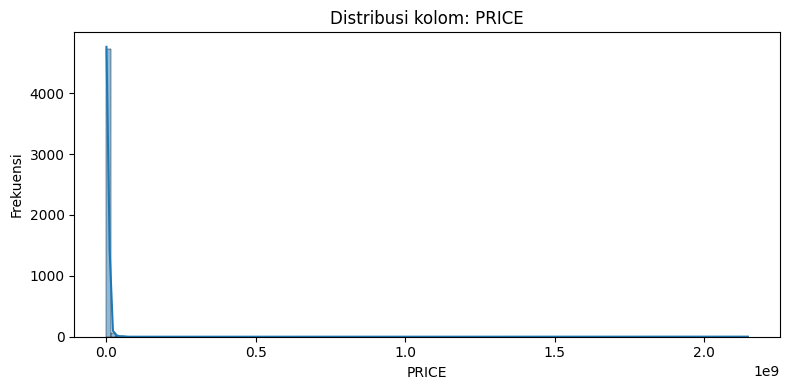

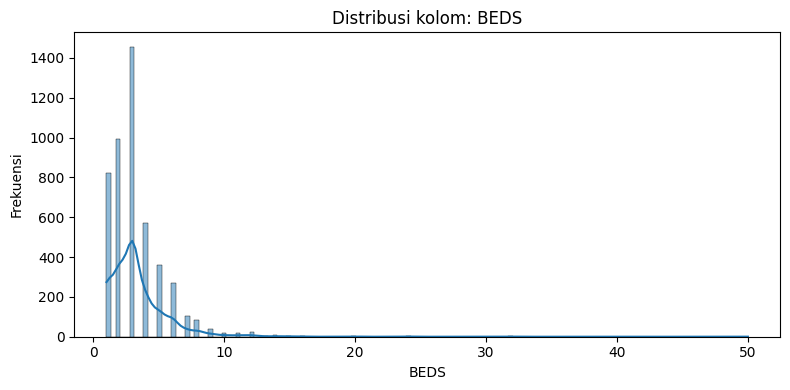

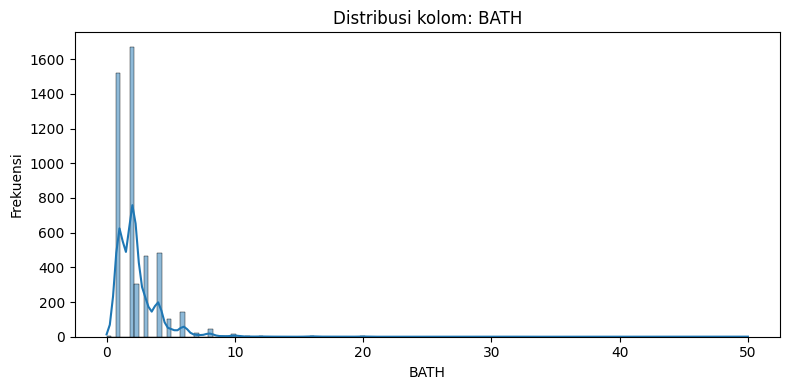

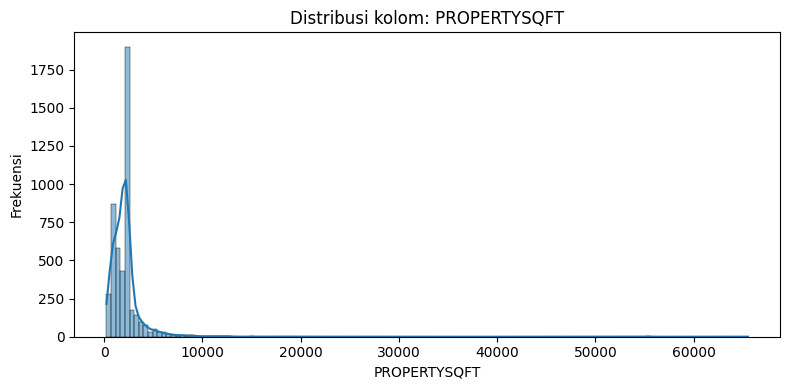

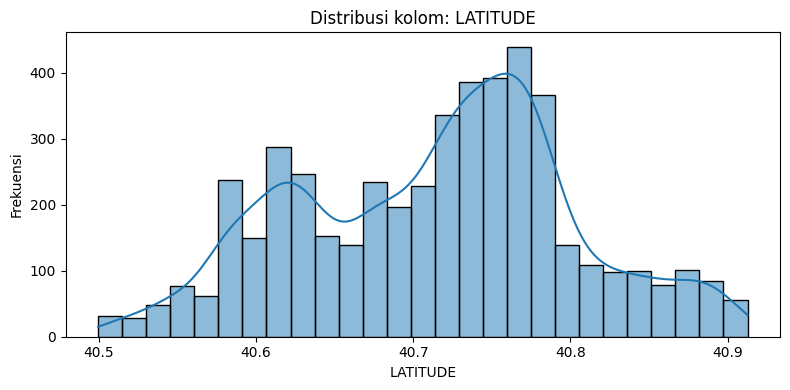

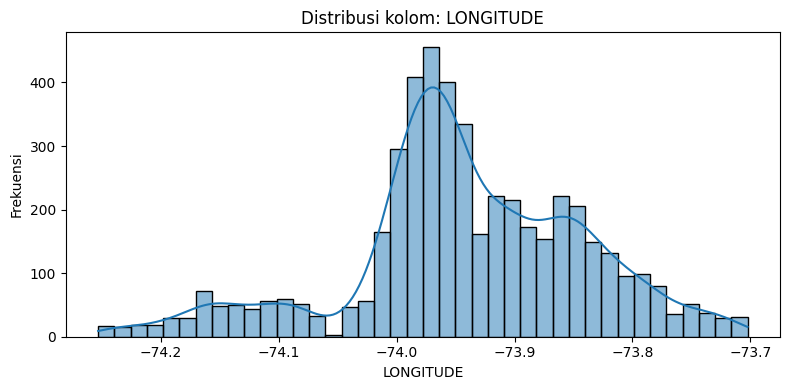

In [142]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


In [143]:
df['PRICE'].sort_values(ascending=True).head(10)
# 304, 1, 317, 310, 360 463 outliers

317      2494
310      3225
360      5800
463     49500
979     60000
188     65000
3       69000
252     69000
132     69900
4003    75000
Name: PRICE, dtype: int64

In [144]:
df['BEDS'].sort_values(ascending=False).head(10)
# remove outlier beds [1143, 2653, 3276,2488,765,2265,3589,3603,4240,2564,1092,1410,1214,750,4191,4404]

1143    50
2653    42
3276    40
2488    36
765     35
2265    32
3589    32
3603    30
1092    24
4240    24
Name: BEDS, dtype: int64

In [145]:
df['PROPERTYSQFT'].sort_values(ascending=False)
#drop values outlier [4623,2146,2148,823,3130,141,2932,2054,917,1823,4353,2107,69,4,2171]

4623    65535.0
2146    55300.0
2148    55300.0
823     48000.0
7       33000.0
         ...   
1494      260.0
332       250.0
2166      250.0
4693      246.0
188       230.0
Name: PROPERTYSQFT, Length: 4801, dtype: float64

In [146]:
df['LOCALITY'].unique()

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)

## Feature Engineering

In [147]:
# drop value 
df.drop([304, 1, 317, 310, 360, 463], inplace=True)  # PRICE outliers
df.drop([1143, 2653, 3276,2488,765,2265,3589,3603,4240,2564,1092,1410,1214,750,4191,4404], inplace=True)  # BEDS outliers
df.drop([4623,2146,2148,823,3130,141,2932,2054,917,1823,4353,2107,69,4,2171], inplace=True)  # PROPERTYSQFT outliers

In [148]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [149]:
# drop columns 
df.drop(['ADDRESS','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS','LONGITUDE', 'LATITUDE','BROKERTITLE','SUBLOCALITY'], axis=1, inplace=True)
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY
0,Condo for sale,315000,2,2.0,1400.000000,"New York, NY 10022",New York
2,House for sale,260000,4,2.0,2015.000000,"Staten Island, NY 10312",New York
3,Condo for sale,69000,3,1.0,445.000000,"Manhattan, NY 10022",New York
5,House for sale,690000,5,2.0,4004.000000,"Brooklyn, NY 11238",New York
6,Condo for sale,899500,2,2.0,2184.207862,"New York, NY 10027",New York County


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          4764 non-null   object 
 1   PRICE         4764 non-null   int64  
 2   BEDS          4764 non-null   int64  
 3   BATH          4764 non-null   float64
 4   PROPERTYSQFT  4764 non-null   float64
 5   STATE         4764 non-null   object 
 6   LOCALITY      4764 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 297.8+ KB


In [151]:
df['BATH'] = df['BATH'].astype(int)
df['PROPERTYSQFT'] = df['PROPERTYSQFT'].astype(int)

In [152]:
# split text pada kolom type
df['TYPE'] = df['TYPE'].str.split('for',expand=True)[0]

In [153]:
df.head(50)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY
0,Condo,315000,2,2,1400,"New York, NY 10022",New York
2,House,260000,4,2,2015,"Staten Island, NY 10312",New York
3,Condo,69000,3,1,445,"Manhattan, NY 10022",New York
5,House,690000,5,2,4004,"Brooklyn, NY 11238",New York
6,Condo,899500,2,2,2184,"New York, NY 10027",New York County
7,House,16800000,8,16,33000,"Staten Island, NY 10304",New York
8,Co-op,265000,1,1,750,"Bronx, NY 10473",The Bronx
9,Co-op,440000,2,1,978,"Brooklyn, NY 11230",Kings County
10,Co-op,375000,2,1,850,"Bronx, NY 10451",Bronx County
11,Townhouse,689000,3,2,1162,"Staten Island, NY 10303",New York


In [154]:

df['ZIP'] = df['STATE'].str.split(',',expand=True)[1]
df['ZIP'] = df['ZIP'].str.split('NY',expand=True)[1]
df['ZIP'] = df['ZIP'].astype(int)


In [155]:
df = df[df['PRICE'] < 1e7]
price_cap = df['PRICE'].quantile(0.95)
df = df[df['PRICE']<= price_cap]

<Axes: xlabel='PRICE', ylabel='Count'>

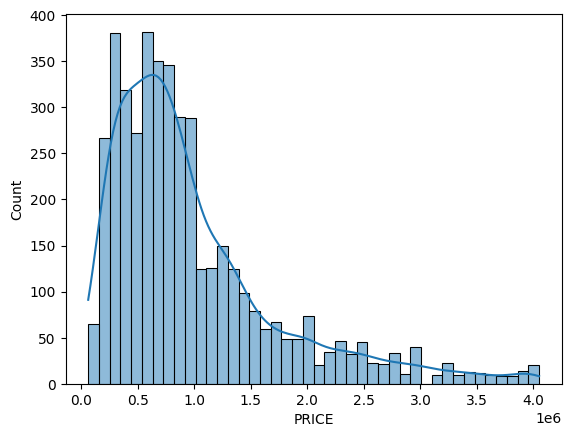

In [156]:
sns.histplot(df['PRICE'], kde=True)

In [157]:
df['PRICE_PER_BATH'] = df['PRICE'] // df['BATH'].replace(0,1)

In [158]:
df['SQFT_PER_BED'] = df['PROPERTYSQFT'] // df['BEDS'].replace(0,1)
df['SQFT_PER_BATH'] = df['PROPERTYSQFT'] // df['BATH'].replace(0,1)

In [159]:
df['IS_LUXURY'] = (df['PRICE'] > 2000000).astype(int)

In [160]:
df['LARGE_HOME'] = (df['PROPERTYSQFT'] > 2500).astype(int)

In [161]:
df.drop(['STATE','TYPE'], axis=1, inplace=True)

In [162]:
df.head(10)

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,ZIP,PRICE_PER_BATH,SQFT_PER_BED,SQFT_PER_BATH,IS_LUXURY,LARGE_HOME
0,315000,2,2,1400,New York,10022,157500,700,700,0,0
2,260000,4,2,2015,New York,10312,130000,503,1007,0,0
3,69000,3,1,445,New York,10022,69000,148,445,0,0
5,690000,5,2,4004,New York,11238,345000,800,2002,0,1
6,899500,2,2,2184,New York County,10027,449750,1092,1092,0,0
8,265000,1,1,750,The Bronx,10473,265000,750,750,0,0
9,440000,2,1,978,Kings County,11230,440000,489,978,0,0
10,375000,2,1,850,Bronx County,10451,375000,425,850,0,0
11,689000,3,2,1162,New York,10303,344500,387,581,0,0
12,259000,3,1,2184,Queens County,11372,259000,728,2184,0,0


In [163]:
df.duplicated().sum()

np.int64(230)

In [164]:
df.drop_duplicates(inplace=True)

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['PRICE'] = scaler.fit_transform(df[['PRICE']])

In [ ]:
df

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,ZIP,PRICE_PER_BATH,SQFT_PER_BED,SQFT_PER_BATH,IS_LUXURY,LARGE_HOME
0,-0.880089,2,2,1400,New York,10022,157500,700,700,0,0
2,-0.951838,4,2,2015,New York,10312,130000,503,1007,0,0
3,-1.201003,3,1,445,New York,10022,69000,148,445,0,0
5,-0.390892,5,2,4004,New York,11238,345000,800,2002,0,1
6,-0.117593,2,2,2184,New York County,10027,449750,1092,1092,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4796,-0.509604,1,1,2184,New York County,10075,599000,2184,2184,0,0
4797,-0.971406,1,1,2184,New York,11374,245000,2184,2184,0,0
4798,0.372257,1,1,2184,New York,10011,1275000,2184,2184,0,0
4799,-0.510745,2,1,655,Queens County,11373,598125,327,655,0,0


## Dataset Preparation

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [166]:
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()


In [168]:
one_hot = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot.fit(X_train[categorical_columns])

X_train_cat = one_hot.transform(X_train[categorical_columns])
X_test_cat = one_hot.transform(X_test[categorical_columns])

encoded_categorical_columns = one_hot.get_feature_names_out(categorical_columns)

X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_categorical_columns, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoded_categorical_columns, index=X_test.index)

X_train_num_df = X_train[numerical_columns].reset_index(drop=True)
X_test_num_df = X_test[numerical_columns].reset_index(drop=True)

X_train_final = pd.concat([X_train_num_df, X_train_cat_df.reset_index(drop=True)],axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df.reset_index(drop=True)],axis=1)
X_train_final.head()

,BEDS,BATH,PROPERTYSQFT,ZIP,PRICE_PER_BATH,SQFT_PER_BED,SQFT_PER_BATH,IS_LUXURY,LARGE_HOME,LOCALITY_Bronx County,LOCALITY_Brooklyn,LOCALITY_Flatbush,LOCALITY_Kings County,LOCALITY_New York,LOCALITY_New York County,LOCALITY_Queens,LOCALITY_Queens County,LOCALITY_Richmond County,LOCALITY_The Bronx,LOCALITY_United States
0,3,2,1290,11373,349500,430,645,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4,4,1619,11236,174750,404,404,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2,2184,11412,317500,728,1092,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,4,1980,10465,249750,396,495,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,750,10463,239000,750,750,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
X_train_final.columns

Index(['BEDS', 'BATH', 'PROPERTYSQFT', 'ZIP', 'PRICE_PER_BATH', 'SQFT_PER_BED',
       'SQFT_PER_BATH', 'IS_LUXURY', 'LARGE_HOME', 'LOCALITY_Bronx County',
       'LOCALITY_Brooklyn', 'LOCALITY_Flatbush', 'LOCALITY_Kings County',
       'LOCALITY_New York', 'LOCALITY_New York County', 'LOCALITY_Queens',
       'LOCALITY_Queens County', 'LOCALITY_Richmond County',
       'LOCALITY_The Bronx', 'LOCALITY_United States'],
      dtype='object')

<Axes: >

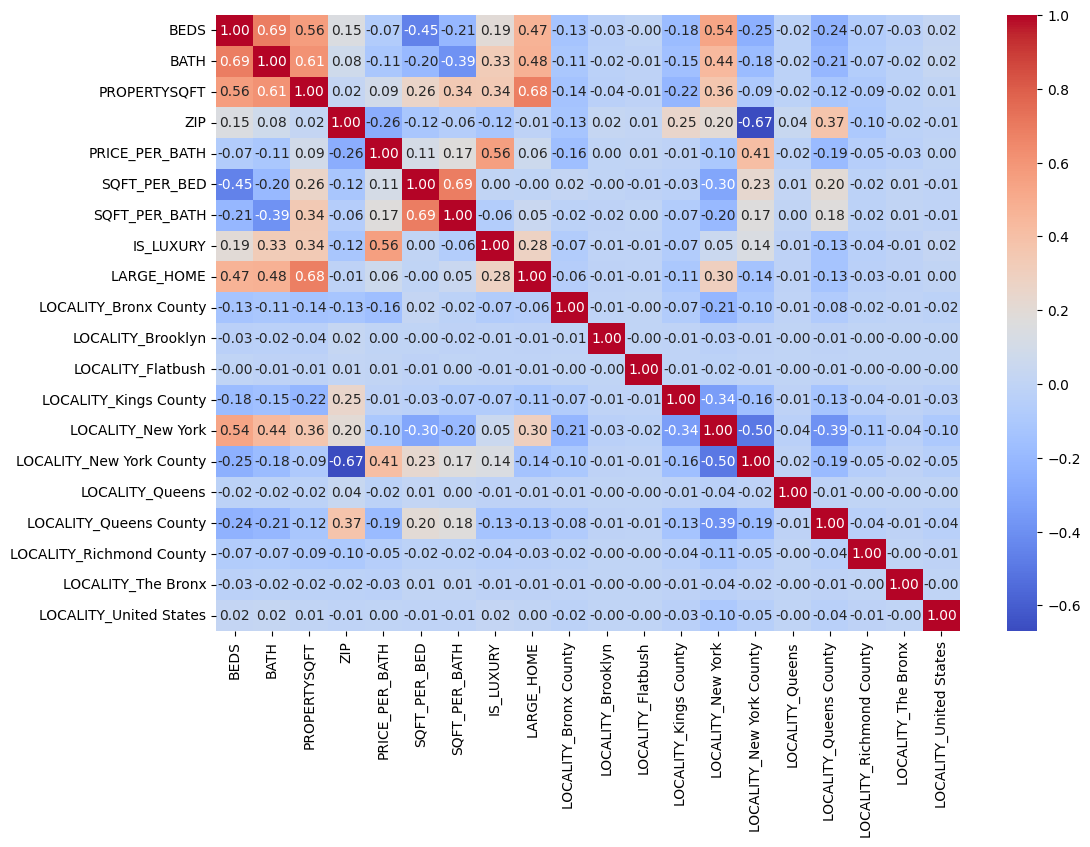

In [170]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_final.corr(), annot=True, fmt=".2f", cmap='coolwarm')

## Model Building and Training

In [171]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
import pickle

In [172]:
xgb_model = XGBRegressor(n_estinamtor=300,max_dept=6,learning_rate=0.1, random_state=42)
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

meta_model = Ridge()
estimators = [
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('dt', dt_model)
]
stacked_model = StackingRegressor(estimators=estimators, final_estimator=meta_model,passthrough=True,cv=5,n_jobs=-1)
stacked_model.fit(X_train_final, np.log1p(y_train))

y_pred_log = stacked_model.predict(X_test_final)
y_pred = np.expm1(y_pred_log)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 10190.881346918983
RMSE: 1179291683.0909934
R² Score: 0.9979783811910488


## With Hyperamater Tuning

In [ ]:
# Grid Search Hyperparameter Tuning
param_grid = {
    'final_estimator__alpha': [0.1, 1.0, 10.0],
    'xgb__n_estimators': [100, 200],
    'rf__n_estimators': [100, 200],
    'gb__n_estimators': [100, 200]
}

grid_search = GridSearchCV(stacked_model,param_grid=param_grid,cv=3,n_jobs=-1,scoring='neg_mean_absolute_error')
grid_search.fit(X_train_final, np.log1p(y_train))

,estimator,StackingRegre...sthrough=True)
,param_grid,"{'final_estimator__alpha': [0.1, 1.0, ...], 'gb__n_estimators': [100, 200], 'rf__n_estimators': [100, 200], 'xgb__n_estimators': [100, 200]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [176]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model", best_model)

Best Parameters: {'final_estimator__alpha': 0.1, 'gb__n_estimators': 200, 'rf__n_estimators': 100, 'xgb__n_estimators': 200}
Best Model StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            

In [177]:
# Best params
final_stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=best_params['final_estimator__alpha']),
    passthrough=True,
    cv=5,
    n_jobs=-1
)

final_stacked_model.fit(X_train_final, np.log1p(y_train))
y_pred_log_final = stacked_model.predict(X_test_final)
y_pred_final = np.expm1(y_pred_log)

print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("RMSE:", mean_squared_error(y_test, y_pred_final))
print("R² Score:", r2_score(y_test, y_pred_final))

MAE: 10190.881346918983
RMSE: 1179291683.0909934
R² Score: 0.9979783811910488


In [ ]:
stacked_model.fit(X_train_final, np.log1p(y_train))

y_pred_log = stacked_model.predict(X_test_final)
y_pred = np.expm1(y_pred_log)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

In [ ]:
MAE: 10190.881346918983
RMSE: 1179291683.0909934
R² Score: 0.9979783811910488